**Predicting Residential Property Prices Using Machine Learning**

**Project Background:**

The real estate industry plays a crucial role in the global economy, influencing financial markets, urban development, and individual investment decisions. Accurate prediction of housing prices has become increasingly important for homeowners, real estate agents, investors, and policymakers alike. Traditional valuation methods often rely on human intuition, comparable sales, or location-based assessments — all of which can be subjective and limited in scope.

With the availability of rich datasets and advanced computational tools, machine learning provides a more data-driven and objective approach to understanding the factors that drive property prices. By analyzing historical data and extracting meaningful patterns, predictive models can estimate future house prices more accurately and efficiently, supporting smarter decision-making in the real estate domain.

**Business Problem:**

In today’s dynamic housing market, determining the fair value of a property is complex. Prices vary significantly due to multiple factors such as location, land size, building quality, amenities, and neighborhood characteristics. Real estate agencies and financial institutions often face challenges in pricing homes accurately — leading to overvaluation (risking losses and unsold inventory) or undervaluation (loss of profit opportunities).

A reliable, automated system capable of predicting house prices based on multiple features can help reduce uncertainty, improve investment strategies, and enhance customer satisfaction. Such a system would enable real estate professionals to make informed, data-driven decisions, optimize pricing strategies, and strengthen market competitiveness.

**Problem Statement:**

Predicting house prices is a challenging task influenced by factors like location, area, age, and quality of construction. The goal of this project is to build a machine learning model that accurately predicts the price of a house based on its features using historical data. This involves performing data preprocessing, exploratory analysis, feature engineering, model training, and hyperparameter tuning to create a reliable and data-driven price prediction system for real estate decision-making.

This cell imports all the necessary Python libraries for data handling, visualization, preprocessing, model building, evaluation, and saving. It sets up the essential tools required for the house price prediction workflow.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

# sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Load data by CSV**

In [3]:
df = pd.read_csv("/content/train (5).csv")
print(df.shape)
df.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


This cell prints the dataset information, including the number of entries, column names, data types, and non-null values. It helps to understand the overall structure and quality of the dataset before preprocessing.

In [6]:
print("Dataset Information ")
df.info()

Dataset Information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

This cell displays the statistical summary of all dataset features, including count, mean, standard deviation, minimum, maximum, and unique values. It helps identify data distribution, possible outliers, and variations across numerical and categorical columns.

In [7]:
print("Statistical Summary.")
df.describe(include='all').T

Statistical Summary.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(" Top 20 Columns with Missing Values ")
df.isnull().sum().sort_values(ascending=False).head(20)

=== Top 20 Columns with Missing Values ===


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [9]:
print("Column Data Types ")
df.dtypes

Column Data Types 


,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


Exploratory Data Analysis (EDA)

This cell visualizes the distribution of the target variable (SalePrice) using a histogram with a KDE curve. It helps identify the spread, skewness, and overall pattern of house prices in the dataset.

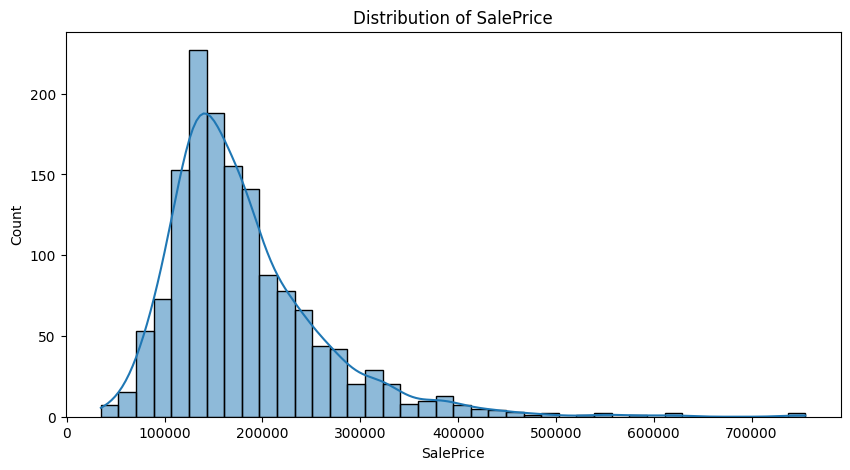

In [12]:
# Target distribution (SalePrice)
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True, bins=40)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

This cell computes the correlation matrix to identify the top 15 features most strongly correlated with the target variable SalePrice. The heatmap visually highlights how these features relate to each other and to house prices, helping to select the most relevant predictors for the model.

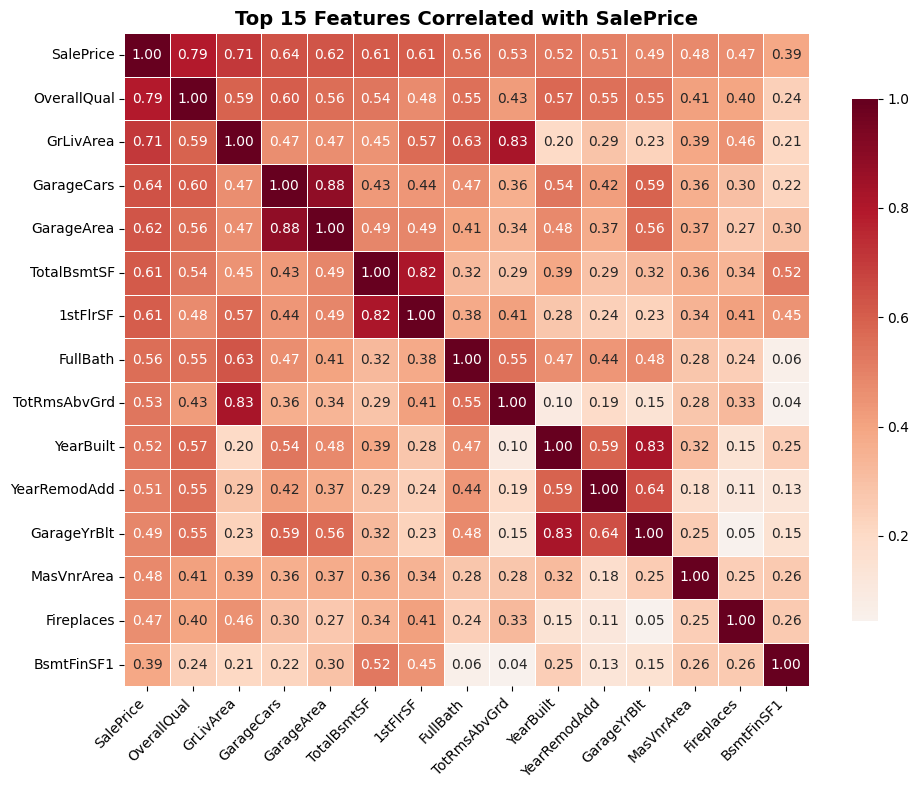

Top correlations with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


In [14]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)
top_corr_features = corr['SalePrice'].abs().sort_values(ascending=False).head(15).index
top_corr_matrix = df[top_corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    top_corr_matrix,
    annot=True,
    cmap='RdBu_r',
    center=0,
    linewidths=0.5,
    fmt=".2f",
    cbar_kws={"shrink": 0.8}
)
plt.title("Top 15 Features Correlated with SalePrice", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("Top correlations with SalePrice:\n", corr['SalePrice'].abs().sort_values(ascending=False).head(15))


This cell creates a pairplot for the top 4 numerical features most correlated with SalePrice. It visually shows the relationships and patterns between these features and the target variable, helping to identify linear trends and potential outliers.

Pairplot columns: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'SalePrice']


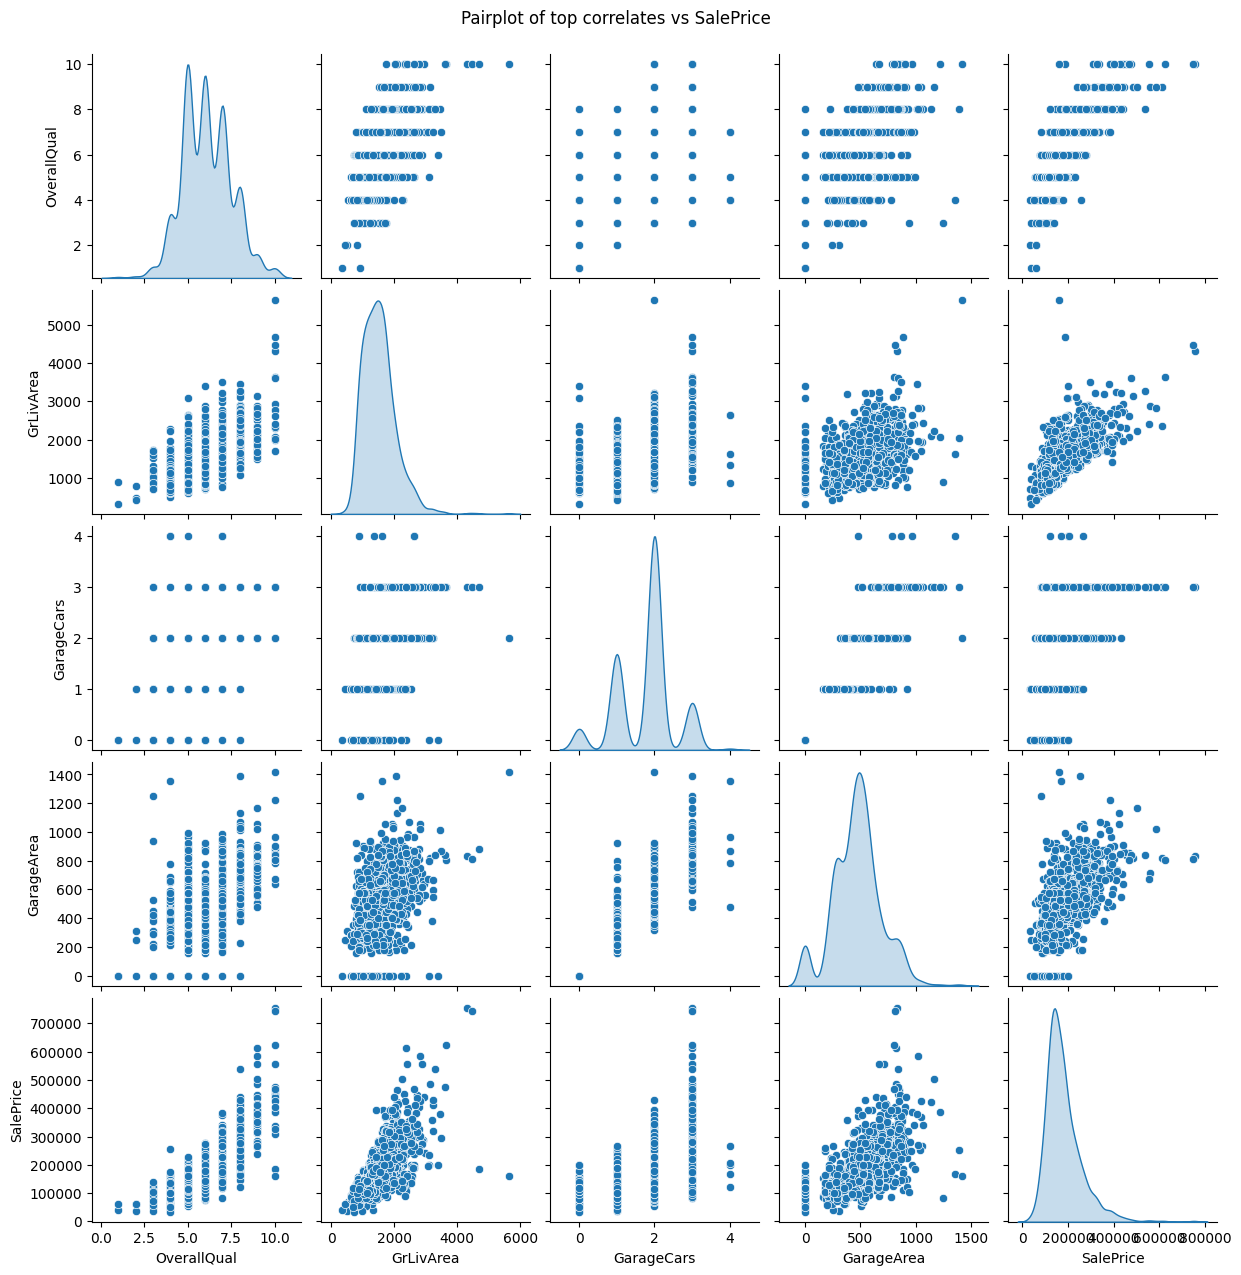

In [15]:
# Pairplot for the top 4 numeric correlates with SalePrice
top_feats = corr['SalePrice'].abs().sort_values(ascending=False).index.drop('SalePrice')[:4].tolist()
pairplot_cols = top_feats + ['SalePrice']

print("Pairplot columns:", pairplot_cols)
sns.pairplot(df[pairplot_cols].sample(frac=1.0, random_state=42), diag_kind='kde', corner=False)
plt.suptitle("Pairplot of top correlates vs SalePrice", y=1.02)
plt.show()


This cell generates boxplots to compare SalePrice across selected categorical features (OverallQual, MSZoning, and Neighborhood). It helps visualize how house prices vary across different categories, revealing trends, group differences, and potential outliers.

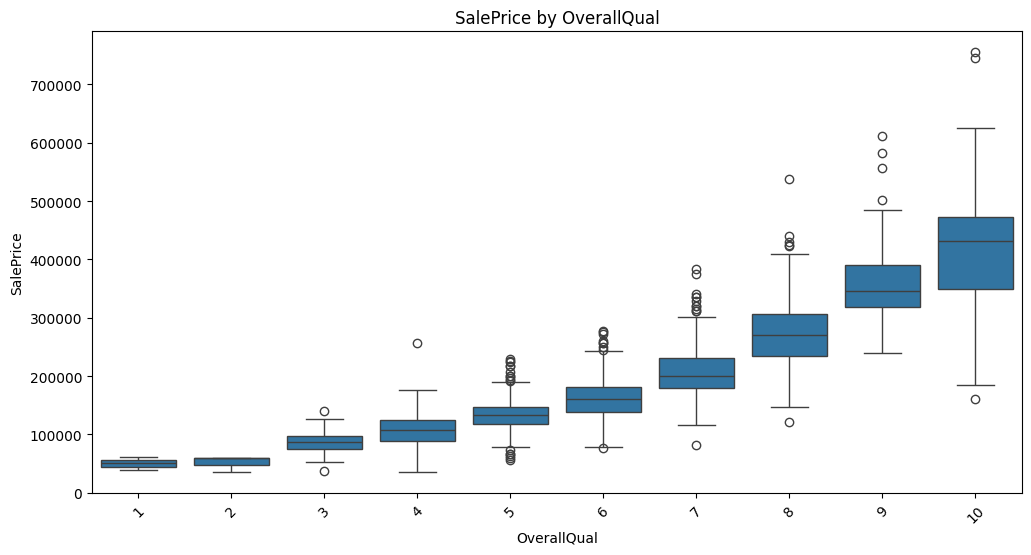

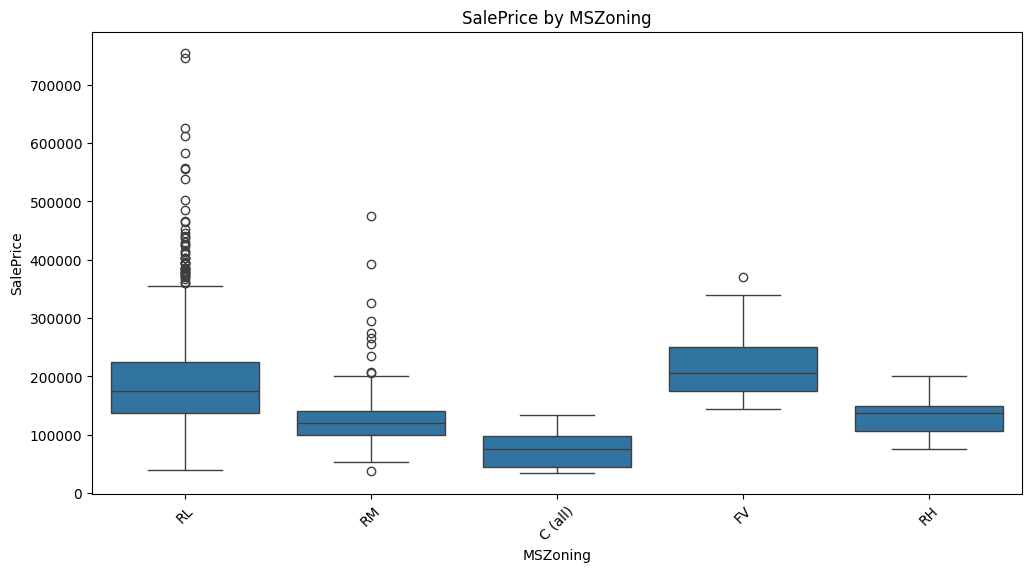

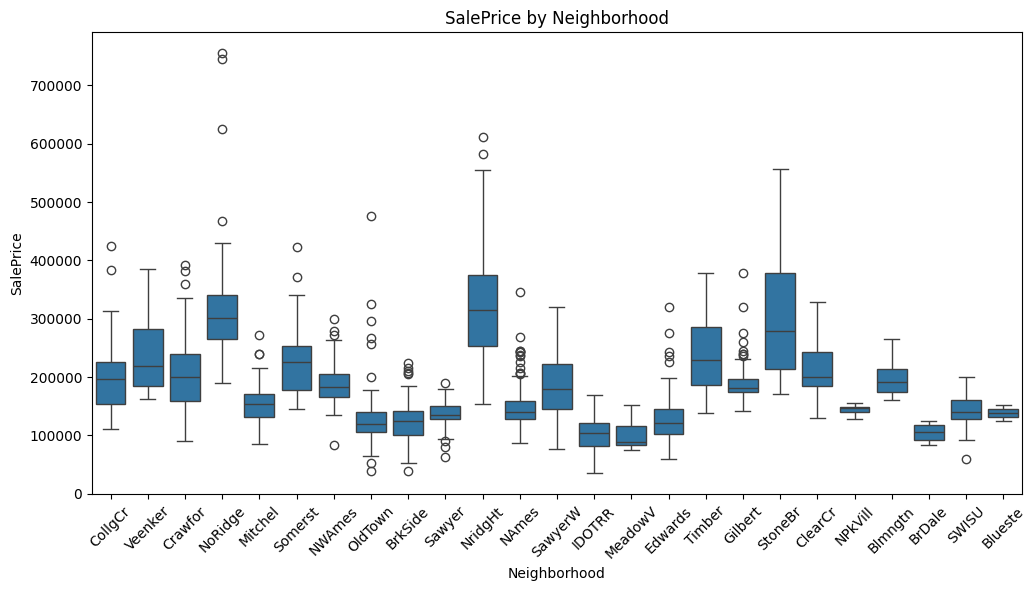

In [16]:
# Boxplots for selected categorical features vs SalePrice
cat_cols_to_plot = ['OverallQual', 'MSZoning', 'Neighborhood']
for col in cat_cols_to_plot:
    if col in df.columns:
        plt.figure(figsize=(12,6))
        sns.boxplot(x=col, y='SalePrice', data=df)
        plt.title(f"SalePrice by {col}")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column {col} not in dataframe")


This cell plots histograms for the first 20 numerical features in the dataset. It helps visualize the distribution, spread, and skewness of numeric variables, allowing you to identify potential outliers or features that may require scaling or transformation.

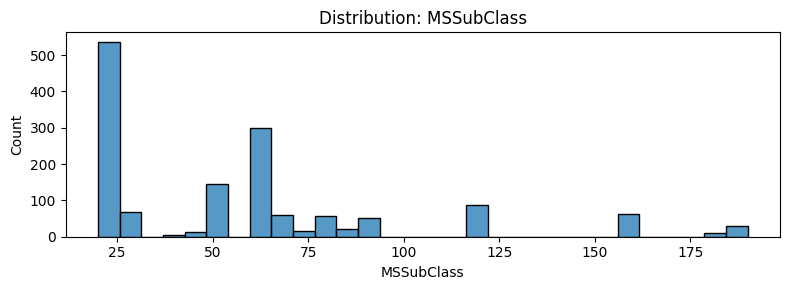

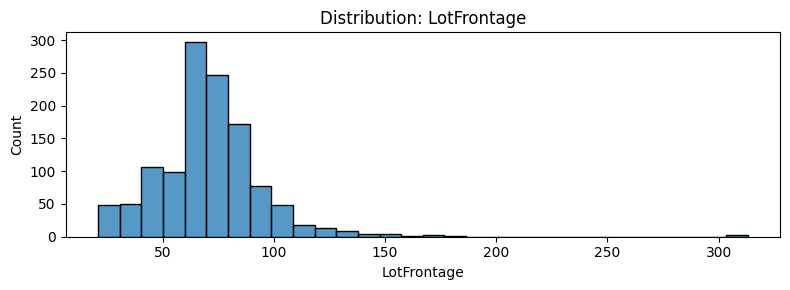

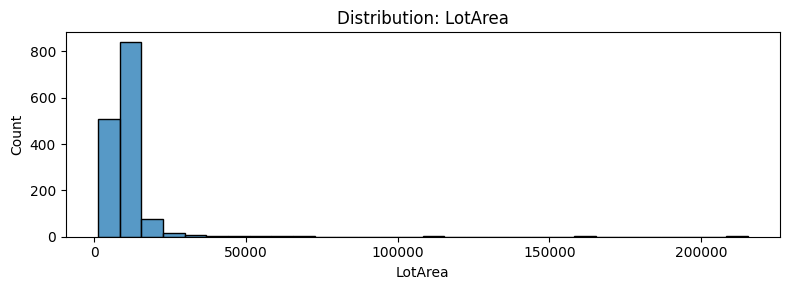

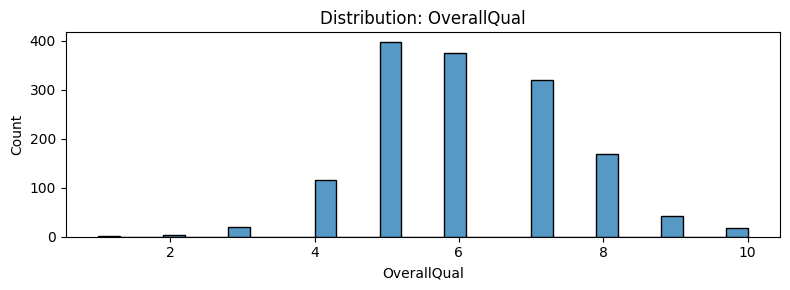

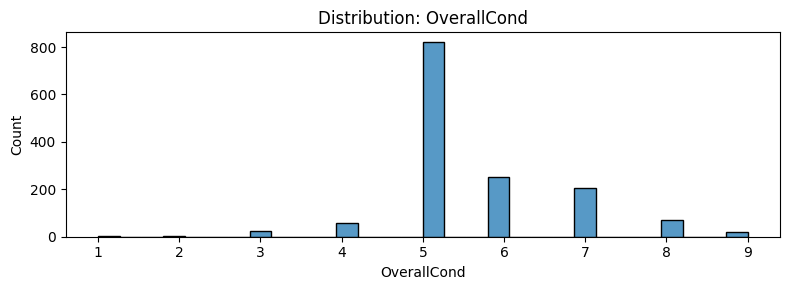

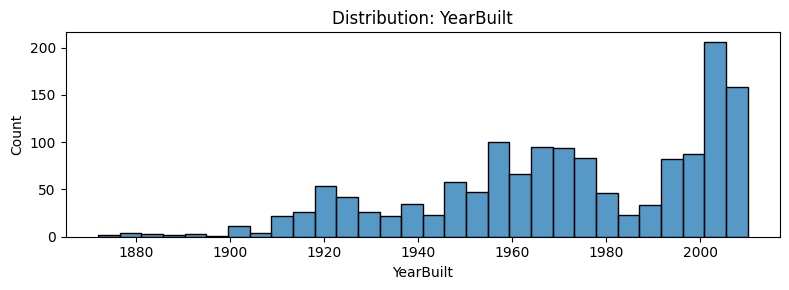

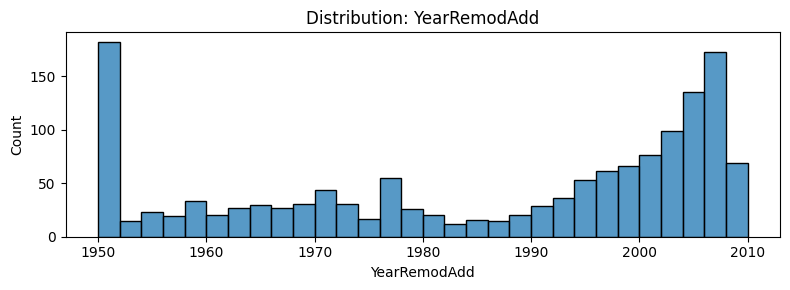

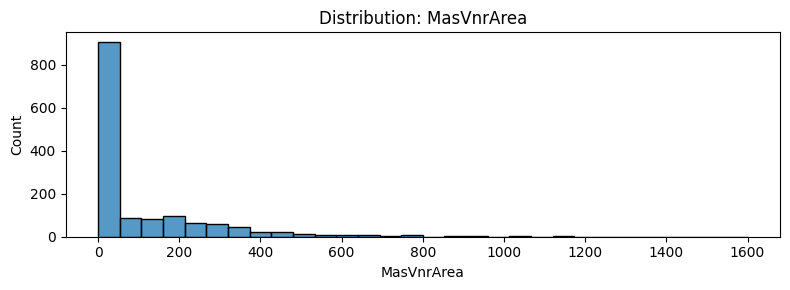

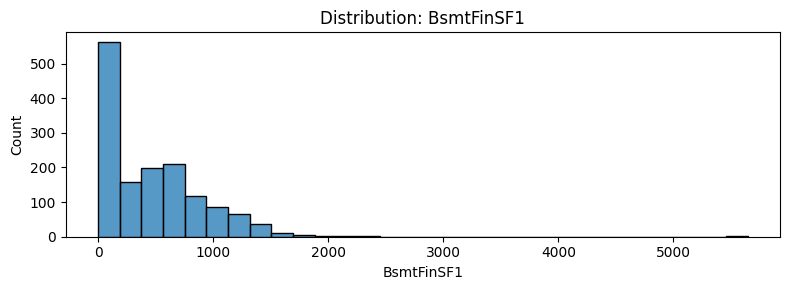

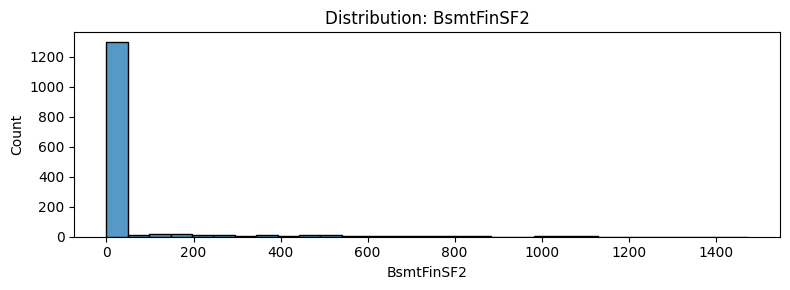

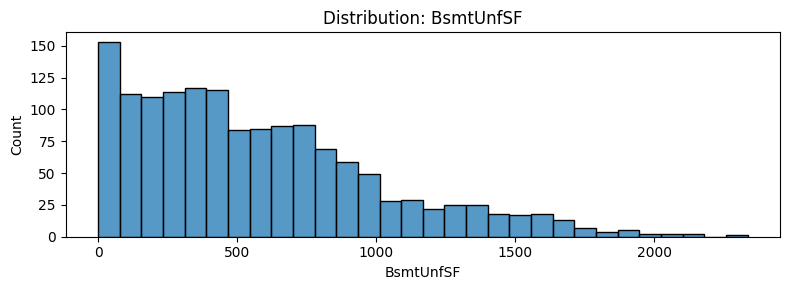

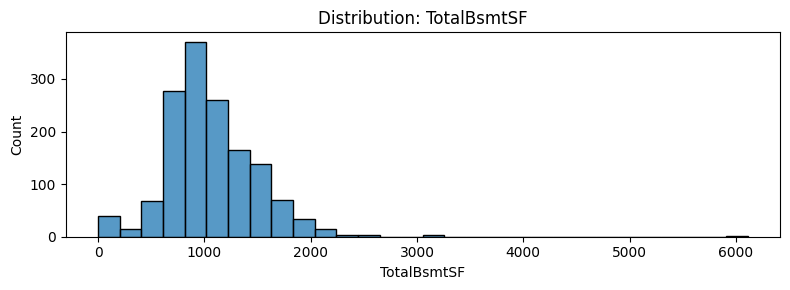

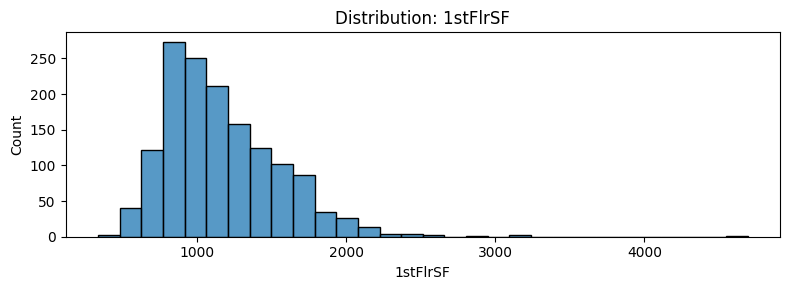

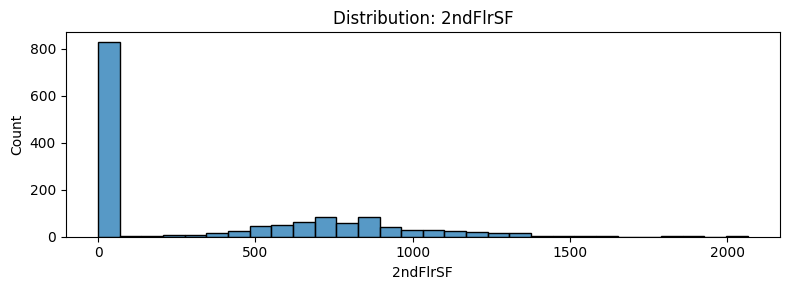

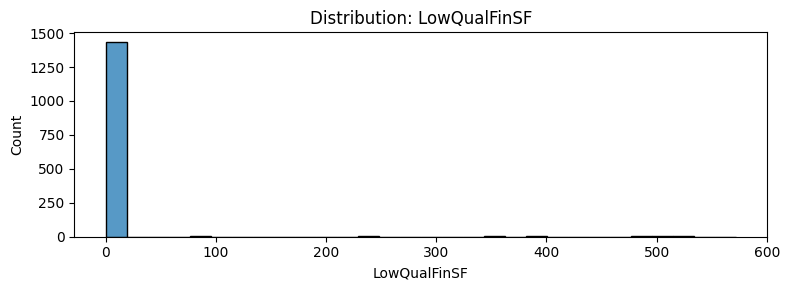

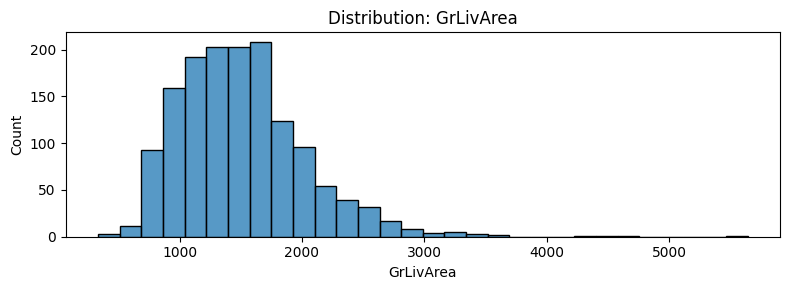

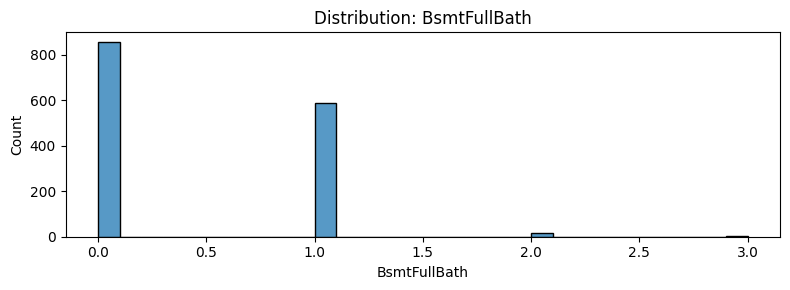

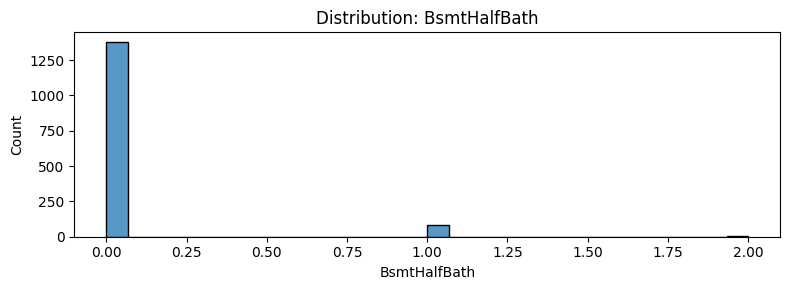

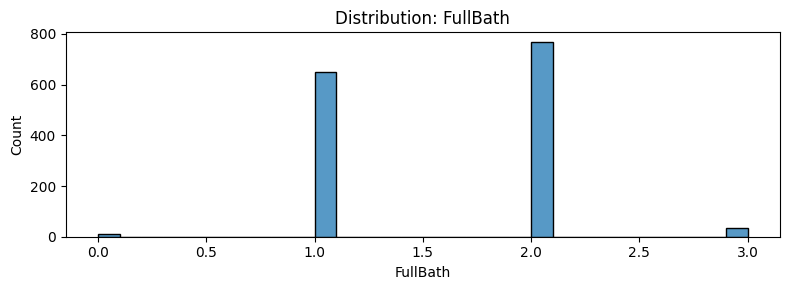

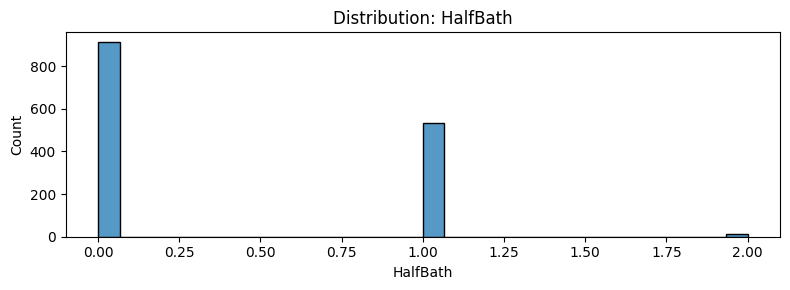

In [20]:
#  Histograms for numeric features (first 20 numeric features to avoid huge output)
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in num_cols if c != 'Id']  # drop Id if present
plot_cols = num_cols[:20]  # visualize first 20 numeric features

for col in plot_cols:
    plt.figure(figsize=(8,3))
    sns.histplot(df[col].dropna(), bins=30, kde=False)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


This cell creates a scatter plot of GrLivArea (above-ground living area) versus SalePrice to identify potential outliers. It highlights houses with unusually large living areas that may distort model training and calculates the 99th percentile threshold to list these outlier points.

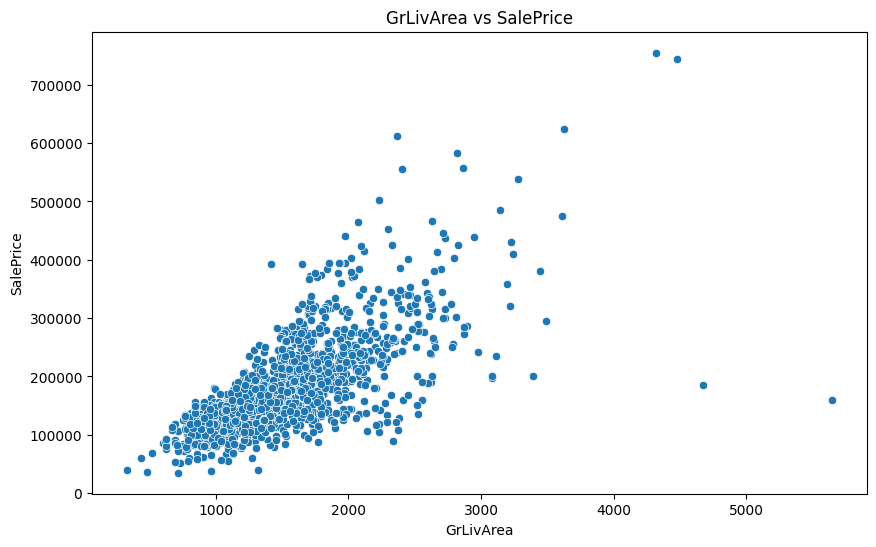

GrLivArea threshold (99th percentile): 3123.4800000000023


,Id,GrLivArea,SalePrice
1298,1299,5642,160000
523,524,4676,184750
1182,1183,4476,745000
691,692,4316,755000
1169,1170,3627,625000
185,186,3608,475000
304,305,3493,295000
1268,1269,3447,381000
635,636,3395,200000
769,770,3279,538000


In [21]:
#  Scatter plot GrLivArea vs SalePrice to spot outliers
if 'GrLivArea' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
    plt.title("GrLivArea vs SalePrice")
    plt.xlabel("GrLivArea")
    plt.ylabel("SalePrice")
    plt.show()
    threshold = df['GrLivArea'].quantile(0.99)
    outliers = df[df['GrLivArea'] > threshold][['Id','GrLivArea','SalePrice']].sort_values(by='GrLivArea', ascending=False)
    print(f"GrLivArea threshold (99th percentile): {threshold}")
    display(outliers)
else:
    print("Column 'GrLivArea' not found in dataframe.")


This cell analyzes how house age and construction year affect SalePrice. It creates scatter plots of SalePrice vs YearBuilt and SalePrice vs Age, helping visualize pricing trends for newer versus older homes and identifying depreciation effects over time.

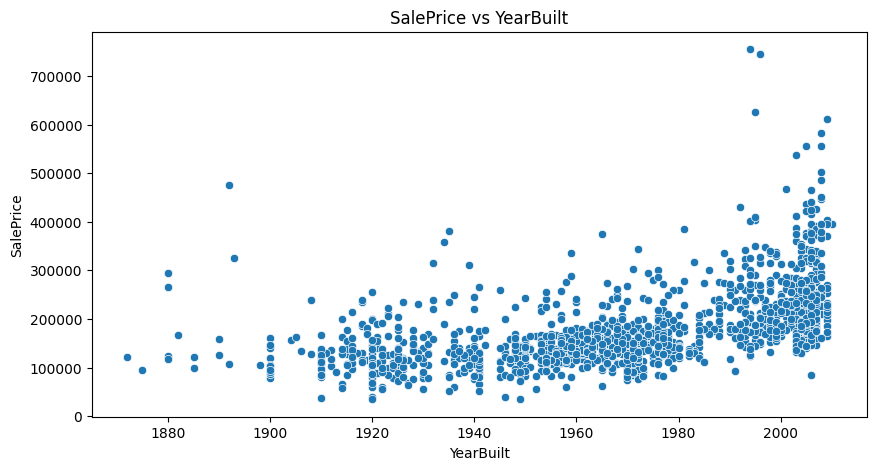

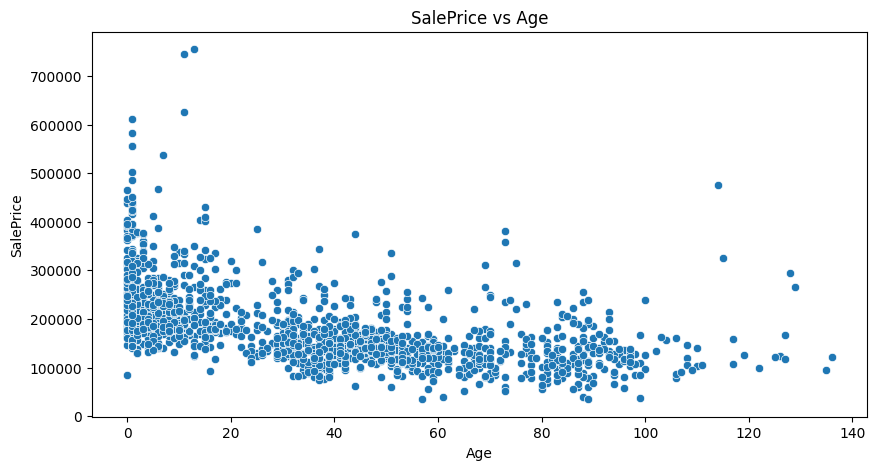

In [22]:
# SalePrice vs YearBuilt and Age
if 'YearBuilt' in df.columns:
    df['Age'] = df['YrSold'] - df['YearBuilt'] if 'YrSold' in df.columns else (2025 - df['YearBuilt'])
    plt.figure(figsize=(10,5))
    sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
    plt.title("SalePrice vs YearBuilt")
    plt.show()

    plt.figure(figsize=(10,5))
    sns.scatterplot(x='Age', y='SalePrice', data=df)
    plt.title("SalePrice vs Age")
    plt.show()
else:
    print("Column 'YearBuilt' not found.")


**Data Preprocessing**

This cell removes any duplicate rows from the dataset to ensure data quality and integrity. It also prints how many duplicates were dropped and shows the new shape of the cleaned dataset.

In [23]:
#  Handle duplicates
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows")
print(f"New shape: {df.shape}")


Removed 0 duplicate rows
New shape: (1460, 82)


This cell handles missing values in the dataset. Columns with more than 50% missing data are dropped to maintain reliability. Remaining numeric features are imputed using the median, while categorical features are filled with their most frequent values, ensuring a complete and clean dataset for model training.

In [29]:
# Missing value imputation
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

missing_percent = df.isnull().mean() * 100
high_missing_cols = missing_percent[missing_percent > 50].index.tolist()

print("Columns with >50% missing values:", high_missing_cols)

df = df.drop(columns=high_missing_cols)
print(f"Remaining columns after dropping: {df.shape[1]}")

# Re-identify numeric and categorical columns after dropping
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print(" Missing value imputation completed successfully!")


Columns with >50% missing values: []
Remaining columns after dropping: 77
 Missing value imputation completed successfully!


In [30]:
#  Verify missing values are handled
print("Remaining missing values per column:")
df.isnull().sum().sort_values(ascending=False).head(10)


Remaining missing values per column:


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


This cell removes extreme outliers from the dataset based on the top 1% of SalePrice values. Eliminating these unusually high-priced houses helps prevent model bias and improves prediction accuracy by focusing on the typical price range.

In [31]:
#  Outlier removal based on SalePrice
threshold = df['SalePrice'].quantile(0.99)
initial_rows = df.shape[0]

df = df[df['SalePrice'] < threshold]
print(f"Removed {initial_rows - df.shape[0]} rows (top 1% SalePrice outliers).")
print(f"New dataset shape: {df.shape}")


Removed 15 rows (top 1% SalePrice outliers).
New dataset shape: (1445, 77)


This cell applies a logarithmic transformation to the target variable SalePrice to reduce skewness and stabilize variance. The transformed target (log1p(SalePrice)) improves model performance for regression algorithms, especially when predicting a wide range of house prices.

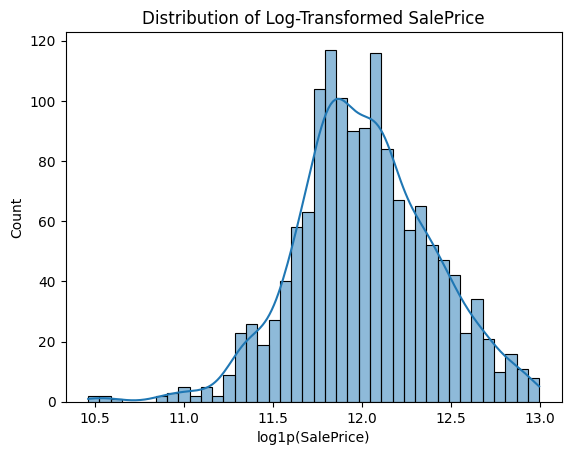

Applied log transformation to target variable (SalePrice).


In [32]:
#  Target transformation (log)
# Create a separate target variable (y) and drop from df later before modeling
y = np.log1p(df['SalePrice'])   # log(1 + x)
sns.histplot(y, kde=True, bins=40)
plt.title("Distribution of Log-Transformed SalePrice")
plt.xlabel("log1p(SalePrice)")
plt.show()

print("Applied log transformation to target variable (SalePrice).")


This cell performs a final check on the dataset after preprocessing. It verifies the dataset shape, ensures there are no remaining null values, and counts the number of numeric and categorical columns, confirming the data is ready for modeling.

In [33]:
#  Check dataset integrity
print("Final shape:", df.shape)
print("Any null values left:", df.isnull().sum().sum())
print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


Final shape: (1445, 77)
Any null values left: 0
Numeric columns: 39
Categorical columns: 38


**Feature Engineering**

This cell performs basic feature engineering by creating new meaningful features such as TotalSF, Age, RemodAge, Bathrooms, and PorchSF. These engineered features combine or transform existing columns to capture more information for the model and potentially improve prediction accuracy.

In [34]:
#  Basic feature engineering
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Age'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['Bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
df['PorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

print(" Created basic engineered features: TotalSF, Age, RemodAge, Bathrooms, PorchSF")
df[['TotalSF','Age','RemodAge','Bathrooms','PorchSF']].head()


 Created basic engineered features: TotalSF, Age, RemodAge, Bathrooms, PorchSF


,TotalSF,Age,RemodAge,Bathrooms,PorchSF
0,2566.0,5.0,5.0,2.5,61.0
1,2524.0,31.0,31.0,2.0,0.0
2,2706.0,7.0,6.0,2.5,42.0
3,2473.0,91.0,36.0,1.0,307.0
4,3343.0,8.0,8.0,2.5,84.0


This cell performs a sanity check on the newly engineered features Age and RemodAge to ensure there are no negative values. Any invalid negative values are corrected to 0, ensuring all features make logical sense before modeling.

In [35]:
#  Sanity check on new features
neg_features = ['Age', 'RemodAge']
for f in neg_features:
    invalid_count = (df[f] < 0).sum()
    print(f"{f}: {invalid_count} invalid values")
    if invalid_count > 0:
        df.loc[df[f] < 0, f] = 0  # correct negative values to 0

df[neg_features].describe()


Age: 0 invalid values
RemodAge: 1 invalid values


,Age,RemodAge
count,1445.000000,1445.000000
mean,36.810381,23.147405
std,30.163544,20.649556
min,0.000000,0.000000
25%,8.000000,4.000000
50%,35.000000,15.000000
75%,55.000000,41.000000
max,136.000000,60.000000


This cell computes the correlation of the engineered features (TotalSF, Age, RemodAge, Bathrooms, PorchSF) with the target variable SalePrice. It helps evaluate the predictive strength of these new features and their potential contribution to the model.


In [36]:
#  Correlation of engineered features with target
new_feats = ['TotalSF','Age','RemodAge','Bathrooms','PorchSF']
corrs = df[new_feats + ['SalePrice']].corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print("Correlation of engineered features with SalePrice:\n")
print(corrs)


Correlation of engineered features with SalePrice:

SalePrice    1.000000
TotalSF      0.760318
Bathrooms    0.591746
PorchSF      0.184377
RemodAge    -0.537365
Age         -0.557214
Name: SalePrice, dtype: float64


This cell visualizes the relationship between the engineered features (TotalSF, Bathrooms, Age, PorchSF) and SalePrice using scatter plots. It helps identify trends, patterns, and potential non-linear relationships that may influence model performance.

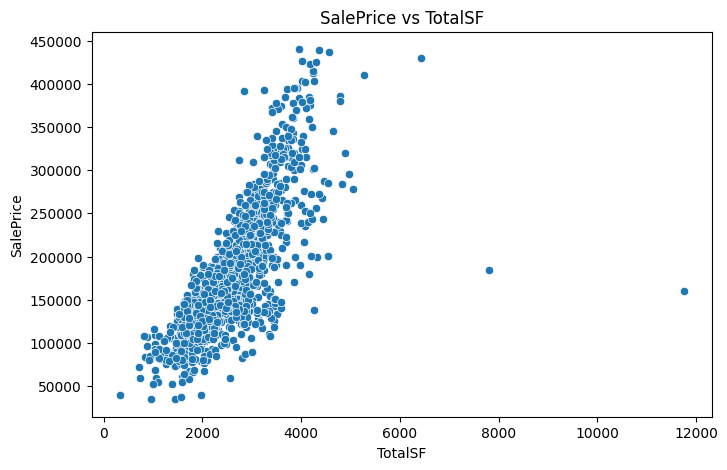

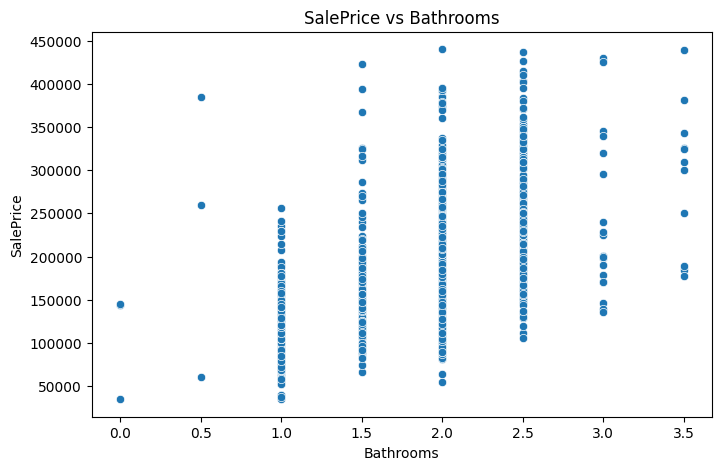

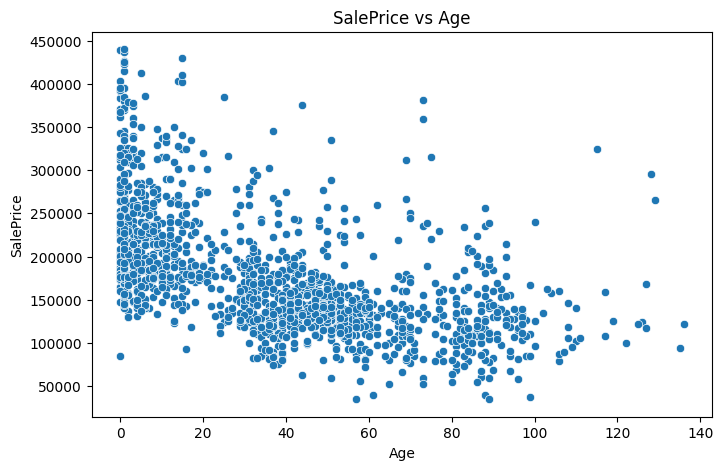

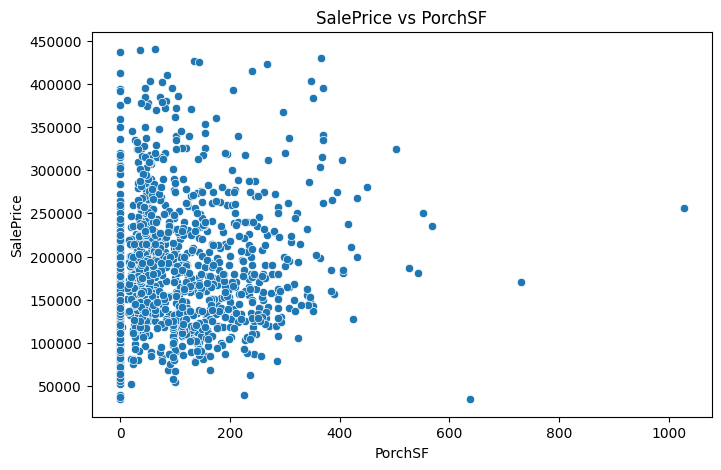

In [37]:
#  Visualize relationships between new features and SalePrice
for col in ['TotalSF', 'Bathrooms', 'Age', 'PorchSF']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f"SalePrice vs {col}")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()


This cell verifies that all engineered features (TotalSF, Age, RemodAge, Bathrooms, PorchSF) have been successfully added to the dataset and displays the first few rows to confirm their values.

In [38]:
#  Check that new features are present
print("Engineered features now in dataset:")
print([c for c in df.columns if c in ['TotalSF','Age','RemodAge','Bathrooms','PorchSF']])
df[['TotalSF','Age','RemodAge','Bathrooms','PorchSF']].head()


Engineered features now in dataset:
['Age', 'TotalSF', 'RemodAge', 'Bathrooms', 'PorchSF']


,TotalSF,Age,RemodAge,Bathrooms,PorchSF
0,2566.0,5.0,5.0,2.5,61.0
1,2524.0,31.0,31.0,2.0,0.0
2,2706.0,7.0,6.0,2.5,42.0
3,2473.0,91.0,36.0,1.0,307.0
4,3343.0,8.0,8.0,2.5,84.0


**Categorical Encoding**

In this phase, the cell prepares the feature matrix X and target vector y for modeling. It separates numeric and categorical features, providing an overview of their counts and examples, ensuring the dataset is ready for preprocessing and encoding steps.

In [41]:
# Ensure X and y exist, and list numeric/categorical cols
# If X and y are not defined yet, create them from df
if 'X' not in globals() or 'y' not in globals():
    try:
        X = df.drop(columns=['SalePrice'])
        y = np.log1p(df['SalePrice'])
    except Exception as e:
        raise RuntimeError("Make sure 'df' exists and contains column 'SalePrice'.") from e

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")
print("Some categorical features:", categorical_features[:20])


Numeric features: 42
Categorical features: 38
Some categorical features: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']


This cell handles ordinal encoding for categorical features with an inherent order (e.g., ExterQual, KitchenQual). Each category is mapped to a numerical score, creating new ordinal columns (*_ord) that preserve the relative ranking for model training.

In [42]:
#  ordinal mappings
ordinal_mappings = {
    'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'BsmtQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},
    'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    # add more mappings if your dataset has them...
}

# Keep only mappings for columns present in X
ordinal_mappings = {k:v for k,v in ordinal_mappings.items() if k in X.columns}
print("Ordinal columns to map:", list(ordinal_mappings.keys()))

# Apply mapping (create new ordinal columns or overwrite)
for col, mapping in ordinal_mappings.items():
    X[col + '_ord'] = X[col].map(mapping)
    # If mapping produced NaNs for unseen categories, fill with 0 (or median)
    X[col + '_ord'] = X[col + '_ord'].fillna(0).astype(float)


Ordinal columns to map: ['ExterQual', 'ExterCond', 'BsmtQual', 'KitchenQual']


In this phase, the cell builds a preprocessing pipeline using ColumnTransformer. Numeric features are imputed and scaled, while categorical features are imputed and one-hot encoded. This ensures all data is transformed consistently and is ready for machine learning models.

In [44]:
#  Build preprocessor with ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Recompute numeric & categorical lists after ordinal mapping
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# If we created ordinal columns, remove original ordinal object columns from categorical list
for orig_col in list(ordinal_mappings.keys()):
    if orig_col in categorical_features:
        categorical_features.remove(orig_col)

print("Final numeric features count:", len(numeric_features))
print("Final categorical features count:", len(categorical_features))

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')   # drop any other columns not specified

Final numeric features count: 46
Final categorical features count: 34


In this phase, the dataset is split into training and testing sets (80/20). The preprocessor is then fitted on X_train and applied to both training and test sets, transforming numeric and categorical features. This ensures the data is ready for model training and evaluation.

In [45]:
#  Train/test split and fit_preprocessor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on X_train
preprocessor.fit(X_train)

# Transform samples to check shapes
X_train_trans = preprocessor.transform(X_train)
X_test_trans = preprocessor.transform(X_test)

print("X_train shape (after transform):", X_train_trans.shape)
print("X_test shape (after transform):", X_test_trans.shape)


X_train shape (after transform): (1156, 260)
X_test shape (after transform): (289, 260)


This cell extracts the feature names after preprocessing, including numeric features and the one-hot encoded categorical features. It helps track the transformed feature set and ensures alignment between transformed data and model inputs.

In [46]:
# Extract transformed feature names (numeric + onehot names)
def get_feature_names_from_preprocessor(preprocessor):
    """Return a list of feature names after ColumnTransformer pipeline transform."""
    num_feats = []
    cat_feats = []

    # numeric feature names (unchanged)
    for name, trans, cols in preprocessor.transformers_:
        if name == 'num':
            num_feats = cols
        if name == 'cat':
            # Get onehot encoder feature names
            ohe = trans.named_steps['onehot']
            # sklearn >=1.0: use get_feature_names_out
            try:
                ohe_names = ohe.get_feature_names_out(cols)
            except:
                # older sklearn
                ohe_names = ohe.get_feature_names(cols)
            cat_feats = list(ohe_names)
    return list(num_feats) + cat_feats

feature_names = get_feature_names_from_preprocessor(preprocessor)
print("Number of features after preprocessing:", len(feature_names))
print("Sample feature names:", feature_names[:40])


Number of features after preprocessing: 260
Sample feature names: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Age', 'TotalSF', 'RemodAge']


**Model Building**

This cell builds a baseline Linear Regression model using a pipeline with preprocessing. It evaluates the model using 5-fold cross-validation to measure predictive performance (R² score) on the full dataset, providing a reference point before testing more complex models.

In [50]:
#  Baseline Linear Regression
RANDOM_STATE = 42
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Cross-validation on full dataset
scores_lr = cross_val_score(pipe_lr, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f"Linear Regression CV R²: {scores_lr.mean():.4f} ± {scores_lr.std():.4f}")


Linear Regression CV R²: 0.8241 ± 0.0676


In [51]:
#  Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print(X_train.shape, X_test.shape)


(1156, 84) (289, 84)


**Random Forest (Baseline CV)**

This cell builds a baseline Random Forest Regressor using a pipeline with preprocessing. It evaluates model performance using 5-fold cross-validation (R² score), providing a more flexible and nonlinear benchmark compared to Linear Regression.

In [52]:
#  Random Forest baseline cross-validation
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=RANDOM_STATE))
])

scores_rf = cross_val_score(pipe_rf, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f"Random Forest CV R²: {scores_rf.mean():.4f} ± {scores_rf.std():.4f}")


Random Forest CV R²: 0.8718 ± 0.0265


This cell performs hyperparameter tuning for the Random Forest model using RandomizedSearchCV. It searches over a defined parameter distribution to find the best combination of trees, depth, and splitting rules, optimizing the model for higher R² performance on cross-validation.

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'model__n_estimators': randint(50, 200),
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 4)
}

random_rf = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist_rf,
    n_iter=8,       # fast search
    cv=3,           # fewer folds
    n_jobs=-1,
    scoring='r2',
    random_state=42,
    verbose=2
)

random_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", random_rf.best_params_)
print(f"Best CV R² Score: {random_rf.best_score_:.4f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters (Random Forest): {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 107}
Best CV R² Score: 0.8610


In [58]:
#  Evaluate tuned Random Forest on test set (RandomizedSearchCV version)
# Get the best model from RandomizedSearchCV
best_rf = random_rf.best_estimator_

# Predict on the test data
y_pred = best_rf.predict(X_test)

# If you applied log-transform on y earlier, inverse it for correct evaluation
try:
    y_pred_inv = np.expm1(y_pred)
    y_test_inv = np.expm1(y_test)
except:
    y_pred_inv, y_test_inv = y_pred, y_test

# Calculate metrics
r2 = r2_score(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"Random Forest Test R²: {r2:.4f}")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")


Random Forest Test R²: 0.8925
MAE: 15,051.54
RMSE: 20,987.44


This cell compares model performance between the baseline Linear Regression and the tuned Random Forest. It shows cross-validation R² scores for both models and the final R² on the test set, helping determine which model provides better predictive accuracy.

In [59]:
#  Compare both models (Linear Regression vs Random Forest tuned with RandomizedSearchCV)
print(f"Linear Regression CV Mean R²: {scores_lr.mean():.4f}")
print(f"Random Forest (tuned) CV Best R²: {random_rf.best_score_:.4f}")
print(f"Random Forest Test R²: {r2:.4f}")


Linear Regression CV Mean R²: 0.8241
Random Forest (tuned) CV Best R²: 0.8610
Random Forest Test R²: 0.8925


This cell visualizes Actual vs Predicted house prices for both Linear Regression and Random Forest on the test set. The plot includes a perfect fit line to assess how closely predictions match actual values and compare model performance visually.

The scatter plot clearly shows how each model captures the overall trend of house prices. Points closer to the red dashed line indicate accurate predictions, while deviations highlight under- or over-predictions. By comparing the density and spread of points for Linear Regression and Random Forest, we can see the Random Forest better handles non-linear relationships and complex feature interactions, resulting in predictions that more closely follow the actual house prices. This visual analysis reinforces the quantitative evaluation metrics and helps identify areas where the model can be further improved.


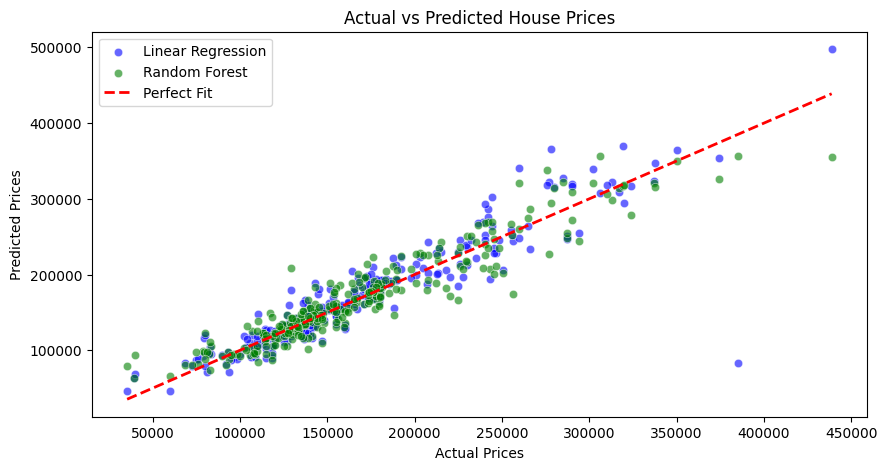

In [60]:
#  Actual vs Predicted plot for Linear Regression and Random Forest
# Refit both models on training data (if not already done)
pipe_lr.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

# Predictions (inverse transform if log-scaled)
y_pred_lr = pipe_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

try:
    y_test_inv = np.expm1(y_test)
    y_pred_lr_inv = np.expm1(y_pred_lr)
    y_pred_rf_inv = np.expm1(y_pred_rf)
except:
    y_test_inv, y_pred_lr_inv, y_pred_rf_inv = y_test, y_pred_lr, y_pred_rf

# Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_inv, y=y_pred_lr_inv, color="blue", label="Linear Regression", alpha=0.6)
sns.scatterplot(x=y_test_inv, y=y_pred_rf_inv, color="green", label="Random Forest", alpha=0.6)
plt.plot([y_test_inv.min(), y_test_inv.max()],
         [y_test_inv.min(), y_test_inv.max()],
         'r--', lw=2, label="Perfect Fit")
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()


**Save Both Models (Linear & Random Forest)**

In [61]:
# Save both models
import joblib
import os

# Create directory if it doesn't exist
os.makedirs("artifacts", exist_ok=True)

# Save Linear Regression pipeline
joblib.dump(pipe_lr, "artifacts/house_price_linear_reg.pkl")

# Save best Random Forest pipeline (from GridSearchCV)
joblib.dump(best_rf, "artifacts/house_price_best_rf.pkl")

print(" Models saved successfully!")
print("Linear Regression → artifacts/house_price_linear_reg.pkl")
print("Random Forest (Tuned) → artifacts/house_price_best_rf.pkl")


 Models saved successfully!
Linear Regression → artifacts/house_price_linear_reg.pkl
Random Forest (Tuned) → artifacts/house_price_best_rf.pkl


**Prepare Test Data for Prediction**

In [62]:
#  Prepare data for prediction (use X_test)
X_pred = X_test.copy()

This cell generates predictions for SalePrice using both the Linear Regression and Random Forest models on a new or test dataset (X_pred). If the target was log-transformed earlier, predictions are inverse-transformed to return to the original scale. A result dataframe is created with Id and predicted prices for easy comparison or export.

In [64]:
#  Generate predictions
# Predict SalePrice using both models
y_pred_lr = pipe_lr.predict(X_pred)
y_pred_rf = best_rf.predict(X_pred)

# If target was log-transformed earlier, inverse it
try:
    y_pred_lr = np.expm1(y_pred_lr)
    y_pred_rf = np.expm1(y_pred_rf)
except:
    pass # No inverse transform needed if target was not log-transformed

# Create an Id column — start after training data's max ID if available
# Assuming X_pred came from X_test, use the original Id from X_test
if 'Id' in X_pred.columns:
    ids = X_pred['Id'].values
else:
     # This case is less likely if X_pred is X_test, but included for robustness
    start_id = df['Id'].max() + 1 if 'Id' in df.columns else 1
    ids = np.arange(start_id, start_id + len(X_pred))


# Create result dataframe
pred_df = pd.DataFrame({
    'Id': ids,
    'SalePrice_LinearRegression': y_pred_lr.round(2),
    'SalePrice_RandomForest': y_pred_rf.round(2)
})

pred_df.head()

,Id,SalePrice_LinearRegression,SalePrice_RandomForest
0,416.0,192818.54,183380.14
1,319.0,341036.62,320724.99
2,1045.0,366079.56,294586.94
3,66.0,308376.66,313686.78
4,1035.0,124027.26,113227.23


This cell saves the predicted house prices to a CSV file for future use or submission. The file includes the Id and predicted values from both Linear Regression and Random Forest, stored in the artifacts folder for easy access.

In [65]:
#  Save to CSV
pred_df.to_csv("artifacts/house_price_predictions.csv", index=False)
print(" Predictions saved to artifacts/house_price_predictions.csv")


 Predictions saved to artifacts/house_price_predictions.csv


**Business Insights and Knowledge Gained**

1.   Key Price Drivers – Features such as overall quality, living area, number of bathrooms, and age/remodel age strongly influence house prices. Understanding these drivers helps real estate professionals prioritize property improvements or investments.
2.   Price Distribution and Market Segmentation – The target distribution and feature correlations reveal typical vs. luxury homes, enabling businesses to segment the market and tailor pricing or marketing strategies.
1.   Impact of Categorical Factors – Neighborhood, zoning, and quality ratings significantly affect prices, guiding location-based investment decisions.
2.   Predictive Pricing – The models provide data-driven, accurate price estimates, which can reduce reliance on subjective appraisals, speed up transactions, and support automated valuation tools.
1.   Outlier Awareness – Identifying outlier properties (e.g., extremely large or high-priced homes) informs risk assessment and highlights properties that may need special attention in valuation.
2.   Feature Engineering Value – Derived features such as TotalSF, PorchSF, and Bathrooms add predictive power, showing how creative aggregation of existing data can uncover hidden insights.
1.   Nonlinear Relationships – Random Forest’s superior performance illustrates that house pricing is often nonlinear and influenced by complex feature interactions, which simple linear models may miss.
2.   Strategic Decision Support – Overall, this analysis equips stakeholders with quantitative insights for investment, pricing, marketing, and development strategies, making real estate decisions more informed and data-driven.


**Conclusion:**

In this project, we developed a machine learning pipeline to predict house prices using historical real estate data. Through exploratory data analysis, preprocessing, feature engineering, and categorical encoding, we prepared the dataset for modeling. Both Linear Regression and Random Forest models were evaluated, with Random Forest achieving higher accuracy due to its ability to capture nonlinear relationships and feature interactions.

The project demonstrates how data-driven insights, such as the influence of overall quality, living area, and neighborhood, can guide real estate decisions. By generating accurate price predictions and understanding key price drivers, stakeholders can make more informed, strategic, and objective decisions in property valuation, investment, and marketing.

This workflow also establishes a reproducible framework for future housing datasets, enabling ongoing improvement and deployment in real-world applications.